# "I'm The King of the World! Or Almost...". Predicting Titanic Passengers' Fate through Machine Learning

# Introduction

"What sort of people were more likely to survive?"

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

import os
for dirname, _, filenames in os.walk('../data/titanic_data'): # listing all files under the data directory
    for filename in filenames:
        print(os.path.join(dirname, filename)) # printing the relative path and the name of the file 

../data/titanic_data/home-data-for-ml-course:train.csv
../data/titanic_data/test.csv
../data/titanic_data/train.csv
../data/titanic_data/gender_submission.csv


# Loading the Data

In [3]:
train_data = pd.read_csv("../data/titanic_data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("../data/titanic_data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploring Patterns

In [5]:
women = train_data.loc[train_data.Sex == 'female']['Survived'] # filtering the data to explore the female passengers who survived in the train dataset
rate_women = sum(women)/len(women) # calculating the percentage of female passengers who survived 

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [6]:
men = train_data.loc[train_data.Sex == 'male']['Survived'] # filtering the data to explore the male passengers who survived in the train dataset
rate_men = sum(men)/len(men) # calculating the percentage of male passengers who survived 

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# Using Machine Learning Model 

In [7]:
from sklearn.ensemble import RandomForestClassifier

y = train_data['Survived']

features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


# Improving Our Model

If Survival = 1, then the passenger survived. 

In [8]:
# Exploring our data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Substituting null values with median which is more robust to outliers
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

## Survival Based on Gender

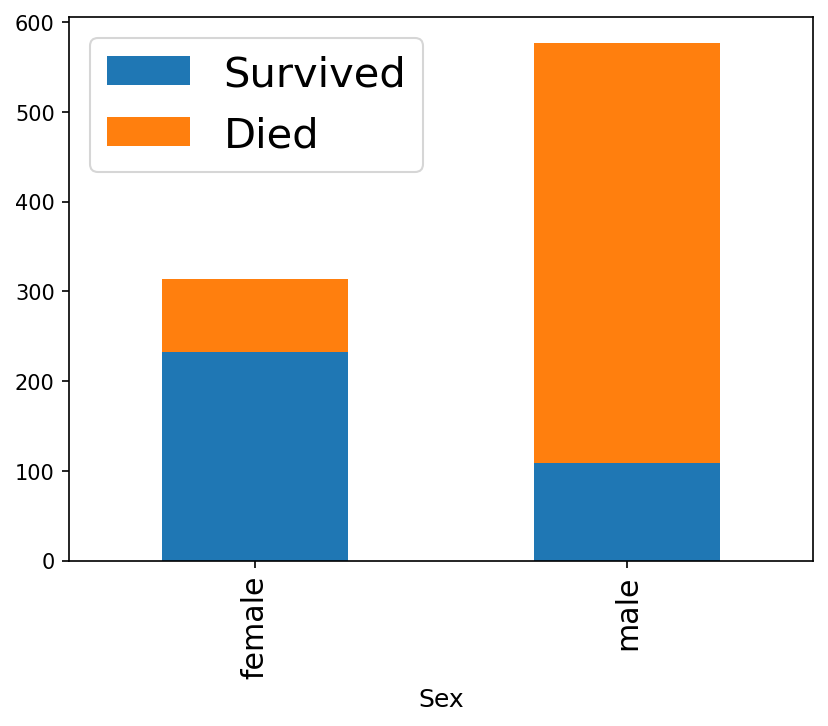

In [ ]:
# Visualising survival based on gender 
train_data['Died'] = 1 - train_data['Survived'] # setting the 'died' info as the opposite of the 'survived' info since survived represents a binary datapoint
train_data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(6.4, 4.8), # resetting size of figure to default 
                                                          stacked=True);

<AxesSubplot:xlabel='Sex'>

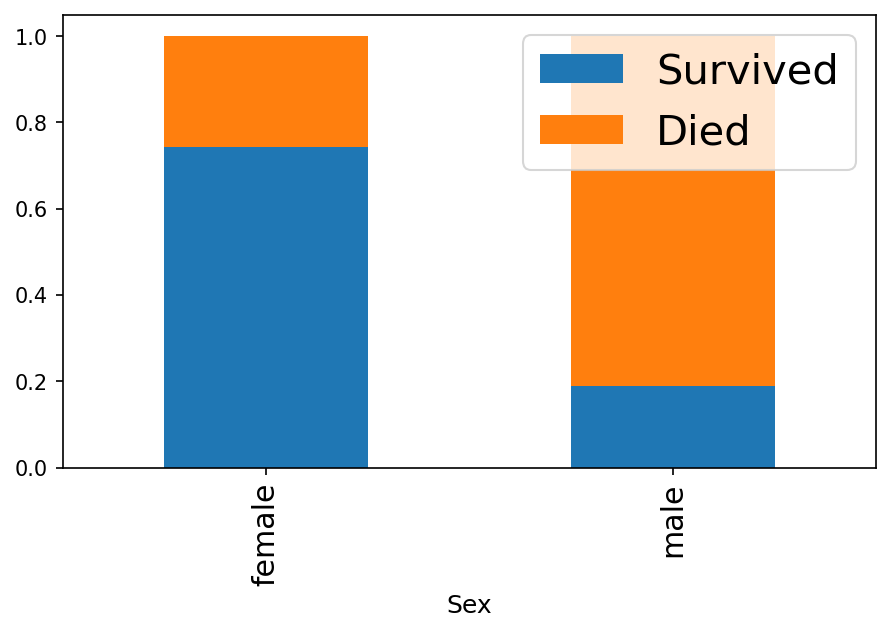

In [31]:
# Plotting the same graph but with ratio instead
train_data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(7, 4),
                                                           stacked=True)

- Women are more likely then men to survive.

## Survival Based on Age

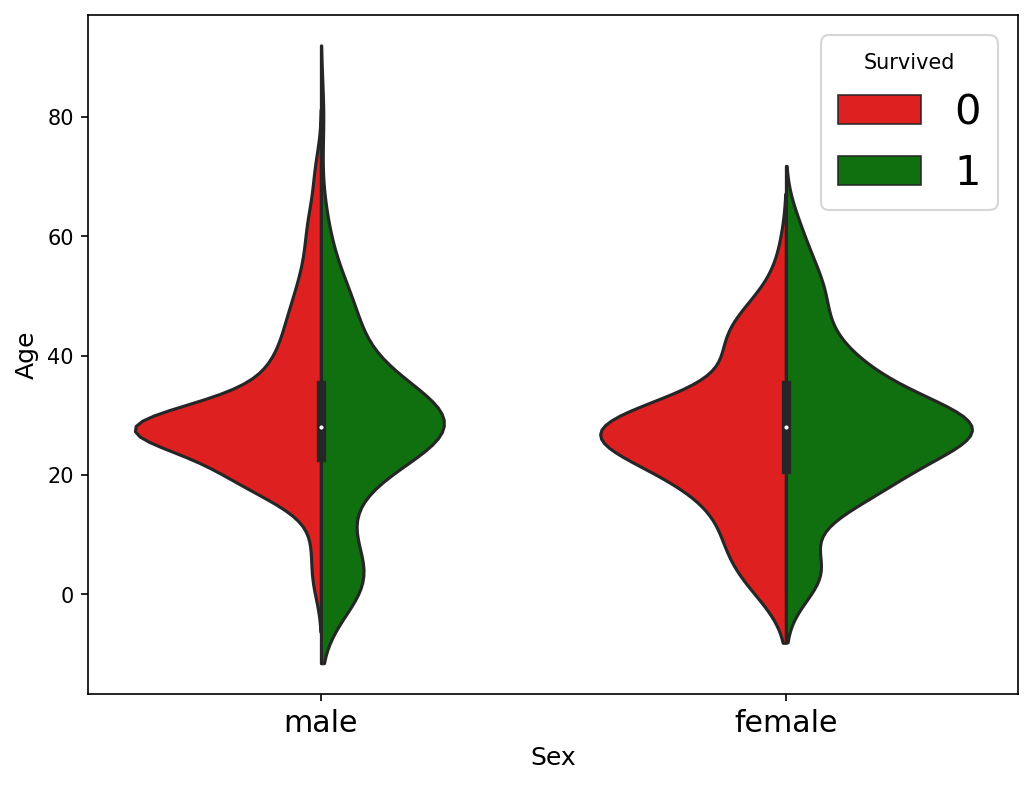

In [12]:
# correlating survival with age 
fig = plt.figure(figsize=(8, 6))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=train_data, 
               split=True,
               palette={0: "r", 1: "g"}
              );

The distribution above is mostly between 20 and 40 years of age for both male and female. This means that age is not a discriminative feature. We will thus exclude the age for now and carry on with our analysis on other features.

## Survival Based on Fare Ticket 

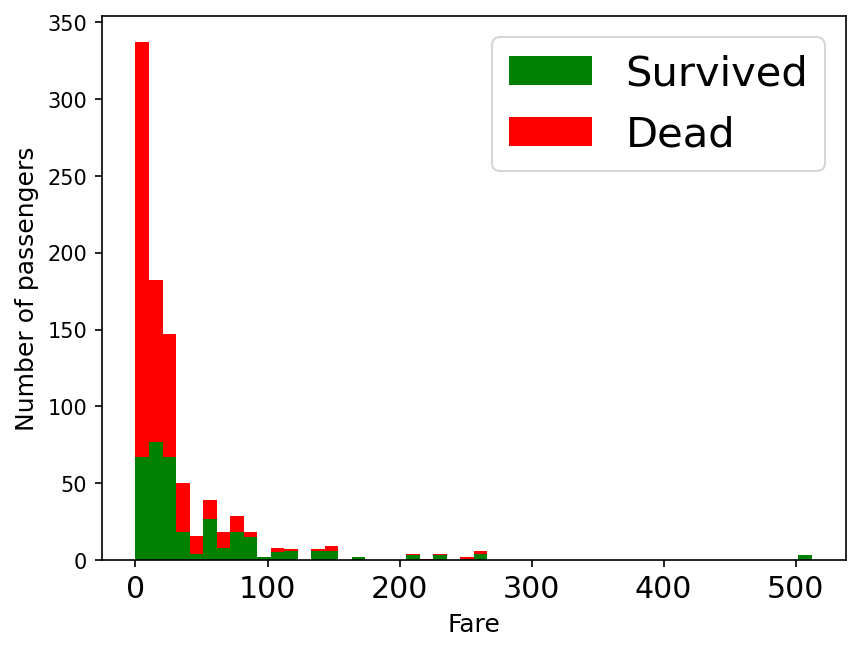

In [13]:
figure = plt.figure(figsize=(6.4, 4.8))
plt.hist([train_data[train_data['Survived'] == 1]['Fare'], train_data[train_data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

- There are lots of passengers with low-price fare tickets. They are more likely to die compared to passengers with higher-price fare tickets. However this is just an assumption and we will need to test if there's any correlation.

Text(0, 0.5, 'Ticket Fare')

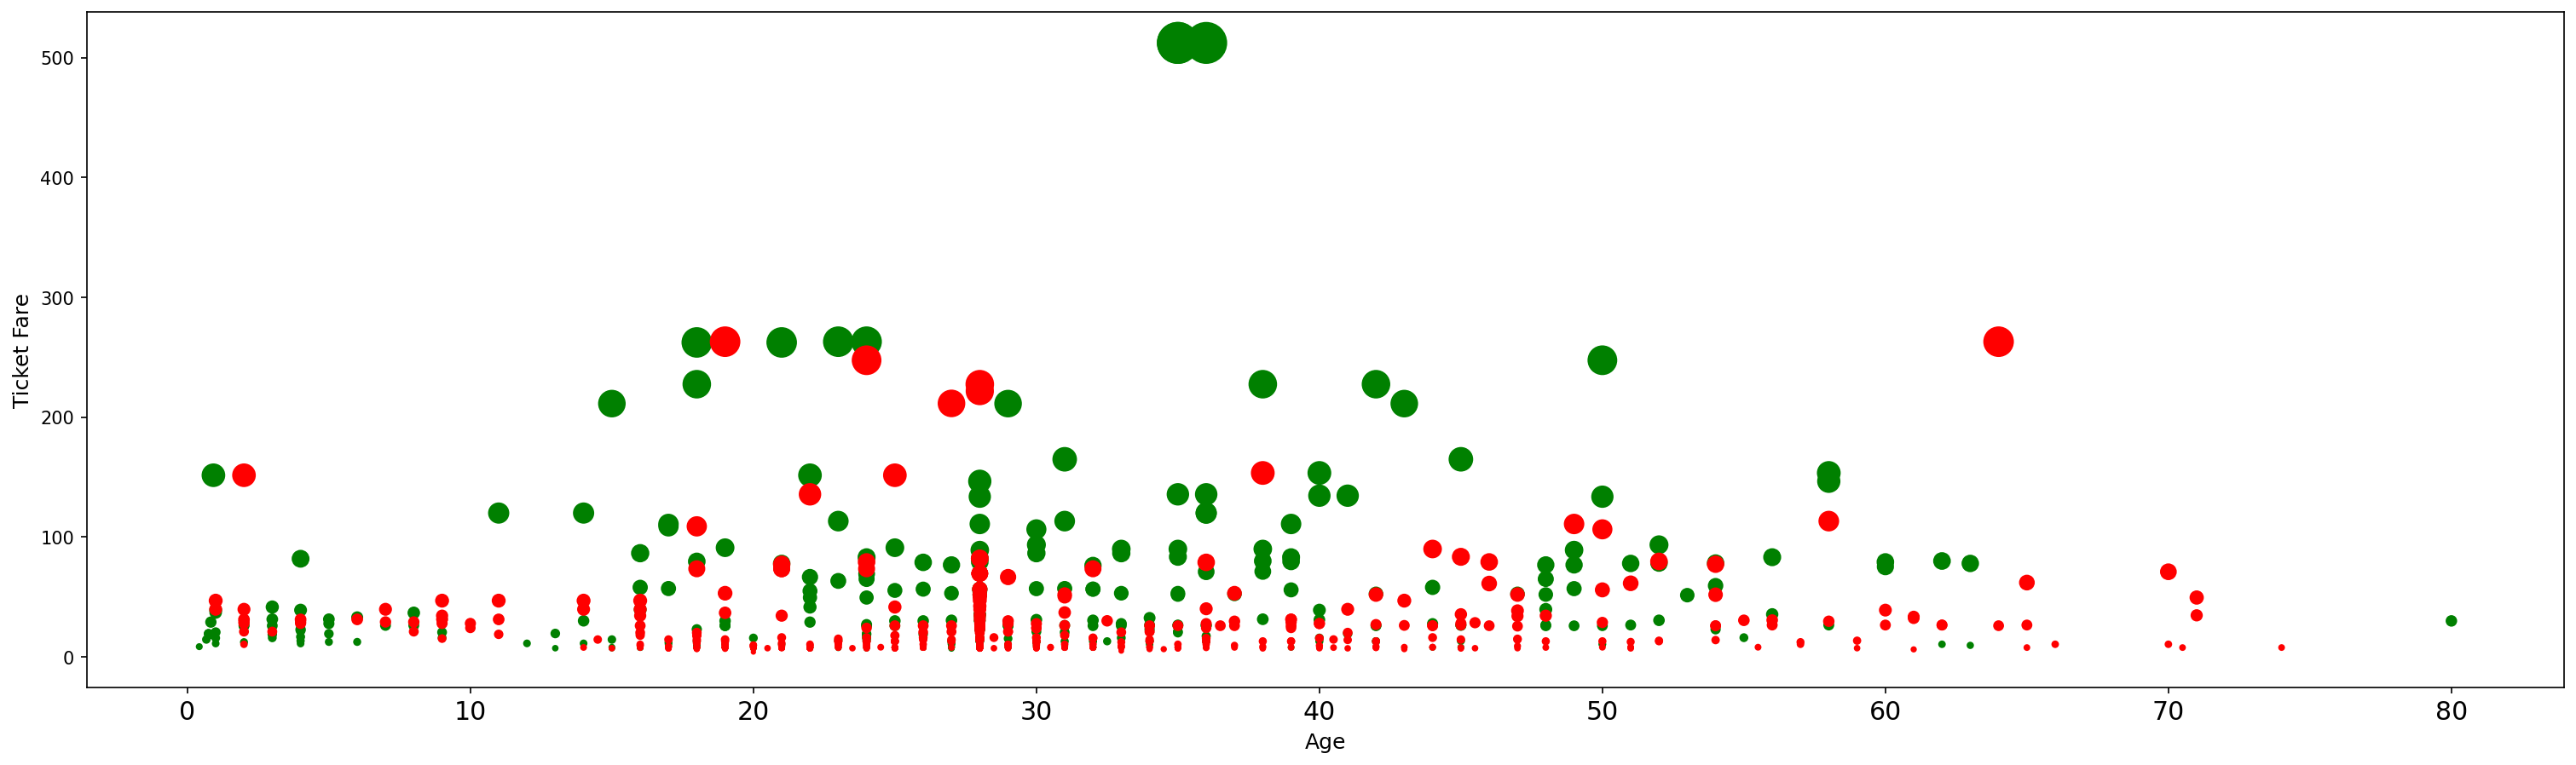

In [14]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(train_data[train_data['Survived'] == 1]['Age'], train_data[train_data['Survived'] == 1]['Fare'], 
           c='green', s=train_data[train_data['Survived'] == 1]['Fare'])
ax.scatter(train_data[train_data['Survived'] == 0]['Age'], train_data[train_data['Survived'] == 0]['Fare'], 
           c='red', s=train_data[train_data['Survived'] == 0]['Fare']);
plt.xlabel('Age') # adding labels to the x axis 
plt.ylabel('Ticket Fare') # adding labels to the y axis 

Clusters observed: 
- large green dots between x=30 and x=40: adults with the largest ticket fares
- small red dots between x=10 and x=45: adults from lower classes on the boat
- small green dots between x=0 and x=7: children that were saved 

## Survival Based on Class

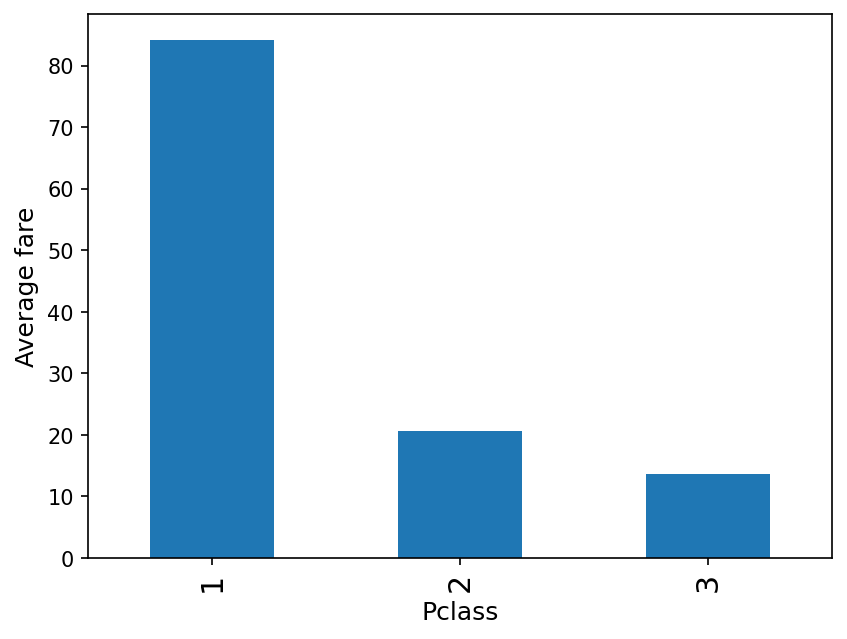

In [15]:
# Checking relationship between ticket fare and passengers' class
ax = plt.subplot()
ax.set_ylabel('Average fare')
train_data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(6.4, 4.8), ax = ax);

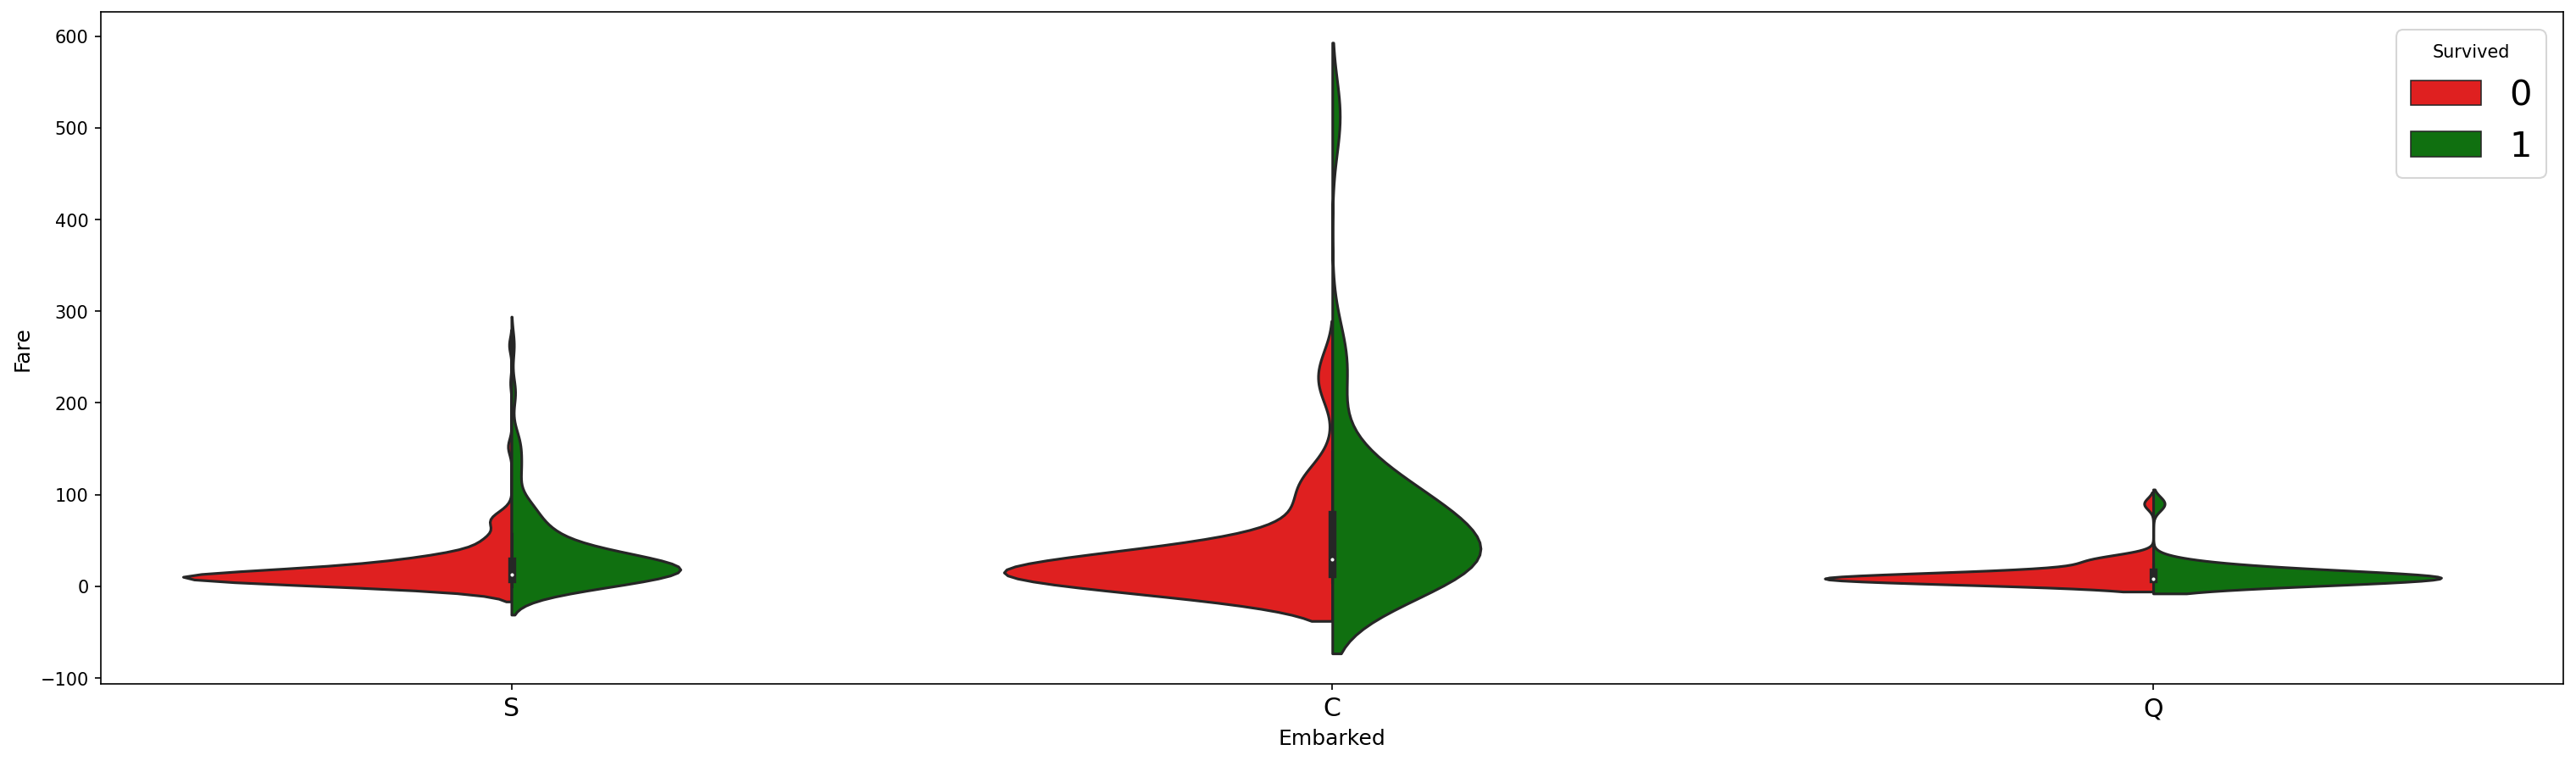

In [16]:
# Visualising how embarkation site affects survival
figsize=(25, 7)
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=train_data, split=True, palette={0: "r", 1: "g"});

## Feature Engineering

In [17]:
# Creating a function that checks if a feature has been processed 
def status(feature):
    print('Processing', feature, ': ok')

### Loading the data

In [18]:
# Combining the data through a function
def get_combined_data():
    train = pd.read_csv("../data/titanic_data/train.csv")
    test = pd.read_csv("../data/titanic_data/test.csv")
    targets = train.Survived # extracting the targets from the training data 
    train.drop(['Survived'], 1, inplace=True) # removing the targets from the training data 
    combined = train.append(test) # merging train data and test data for future feature engineering
    combined.reset_index(inplace=True) 
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1) # removing the PassengerID as it is not an informative feature
    return combined

combined = get_combined_data()

## Extracting the Passenger Titles

In [20]:
titles = set() # initiating an empty set 
for name in train_data['Name']: # iterating through the name column of the train dataset 
    titles.add(name.split(',')[1].split('.')[0].strip()) # extracting the titles from each name  

print(titles)
# set(['Sir', 'Major', 'the Countess', 'Don', 'Mlle', 'Capt', 'Dr', 'Lady', 'Rev', 'Mrs', 'Jonkheer', 'Master', 'Ms', 'Mr', 'Mme', 'Miss', 'Col'])

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

# Creating a function that gets the title from each name 
def get_titles():
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip()) # extracting the title from each name
    combined['Title'] = combined.Title.map(Title_Dictionary) # mapping each title 
    status('Title')
    return combined

{'Ms', 'the Countess', 'Lady', 'Capt', 'Don', 'Mrs', 'Rev', 'Mme', 'Sir', 'Mlle', 'Col', 'Major', 'Dr', 'Mr', 'Jonkheer', 'Miss', 'Master'}


In [21]:
# reassigning the function to the variable called combined
combined = get_titles()
combined

Processing Title : ok


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [22]:
# Checking if titles have been filled correctly
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN
